In [23]:
import numpy as np
import pymc3 as pm
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import arviz as az
import fitness_mcmc
import fitness_mcmc.data_io as io
import fitness_mcmc.fitness_mcmc as m

[[ 13439   1374   2005      0      0      0]
 [ 12698   1465   2146      0      0      0]
 [ 16799   1694   3008      0   5727      0]
 [ 12833   1427   2110      0      0      0]
 [ 17980   1694   3412      0   5668      0]
 [ 16960   1748   2924      0   1111      0]
 [ 16440   1692   2724      0   1075      0]
 [ 13905   1402   2199      0      0      0]
 [ 15732   1711   2555      0      0      0]
 [ 16299   1554   2555      0      0      0]
 [ 15367   1590   2527      0   1031      0]
 [ 17082   1605   2856      0   1061      0]
 [ 14917   1579   2738      0   1060      0]
 [ 14290   1513   2216      0      0      0]
 [ 15905   1545   2428      0      0      0]
 [ 17227   1674   2941      0   1139      0]
 [ 13856   1511   2453      0      0      0]
 [ 13012   1434   2324      0   4179      0]
 [ 15562   1623   2423      0   1017      0]
 [  3987      0   1570      0      0      0]
 [  3558      0   2545      0      0      0]
 [  3581   1203   5588   1706   1689      0]
 [  3370  

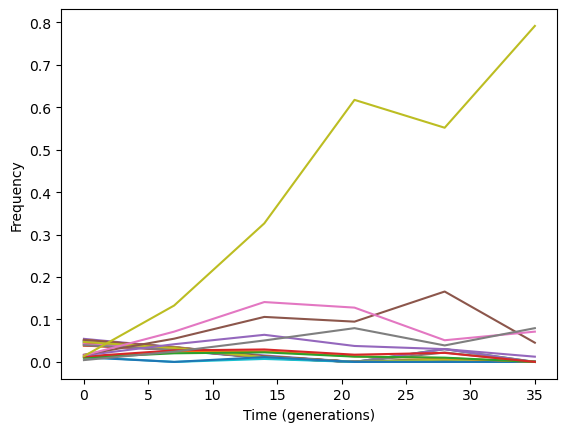

In [24]:
environment = "gluL"
replicate = 3
r = environment + str(replicate)

data, time, ordered_counts = io.load_data("LTEE_" + r + ".csv", return_ordered = False, delimiter=",")
print(ordered_counts.astype("int"))
print(data)

ordered_frequencies = ordered_counts / np.sum(ordered_counts, axis = 0)

plt.plot([0,7,14,21,28,35], ordered_frequencies.T)
plt.xlabel('Time (generations)')
plt.ylabel('Frequency')
plt.show()

In [ ]:
fitness_model = m.Fitness_Model(ordered_counts, time, s_ref = 0, prior="flat")
fitness_model.find_MAP()

C:\Users\jedwa\anaconda3\envs\Fitness_code\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in true_divide
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


In [ ]:
fitness_model.plot_MAP_estimate(type = "lin", filename="LTEE_" + r + "_freq.png")
vals_s = fitness_model.map_estimate["s"]
vals_f0 = fitness_model.map_estimate["f0"]
vals_data = fitness_model.data
#print(vals_data)

In [ ]:
out = open("Fitness_" + r + ".csv", "w")
header = "BC,0,7,14,21,28,35,s,f0"
bc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,500,1000,1500,2000,5000,10000,15000,30000,40000,50000]
out.write(header)
out.write("\n")
holder = str(bc[0])
for h in range(0, 6):
    holder += ',' + str(vals_data[0][h])
holder += ',ref,' + str(vals_f0[0])
out.write(holder)
out.write("\n")
for l in range(0, len(vals_s)):
    holder = str(bc[l + 1])
    for h in range(0, 6):
        holder += ',' + str(vals_data[l + 1][h])
    holder += ',' + str(vals_s[l][0]) + ',' + str(vals_f0[l + 1])
    out.write(holder)
    out.write("\n")
out.close()